In [2]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()
print('_'*40)
train.isnull().sum()
## 一共79个特征，除去价格和ID，估计需要合理的降维，先观察相关性

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


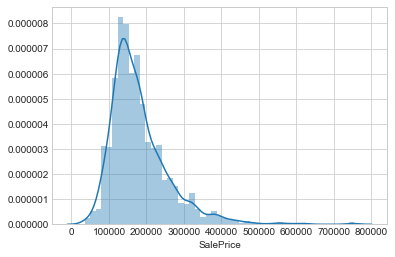

In [5]:
train['SalePrice'].describe()
sns.distplot(train['SalePrice'])

## 遍历特征列表后，人工选出觉得重要的几个参数，将其与价格的关系图表化

- 地上建筑面积
- 地下室面积
- 房屋整体质量等级

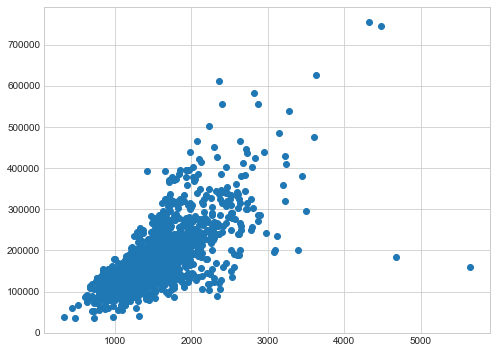

In [5]:
#地上建筑面积
plt.subplots(figsize=(8, 6))
plt.scatter(x = train.GrLivArea,y = train.SalePrice)

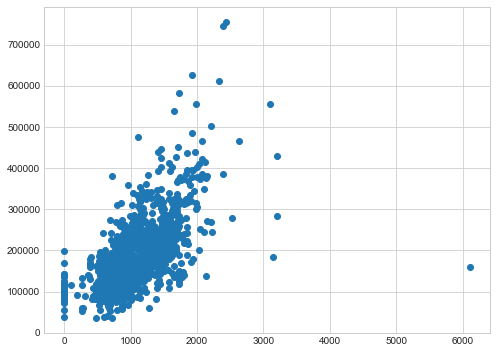

In [6]:
#地下室面积
plt.subplots(figsize=(8, 6))
plt.scatter(x = train.TotalBsmtSF,y = train.SalePrice)

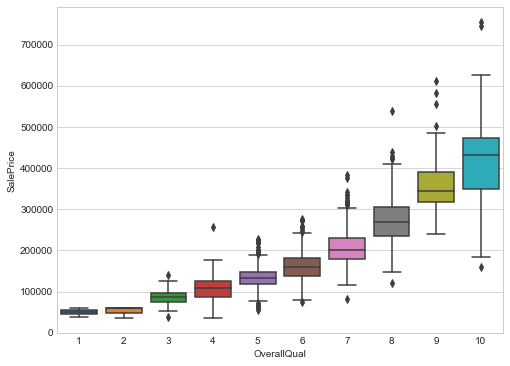

In [7]:
#房屋整体质量等级
plt.subplots(figsize=(8, 6))
sns.boxplot(x='OverallQual', y="SalePrice", data=train)


## 至于其他众多参数，我们选择建造热力图，来显示他们与价格的相关关系

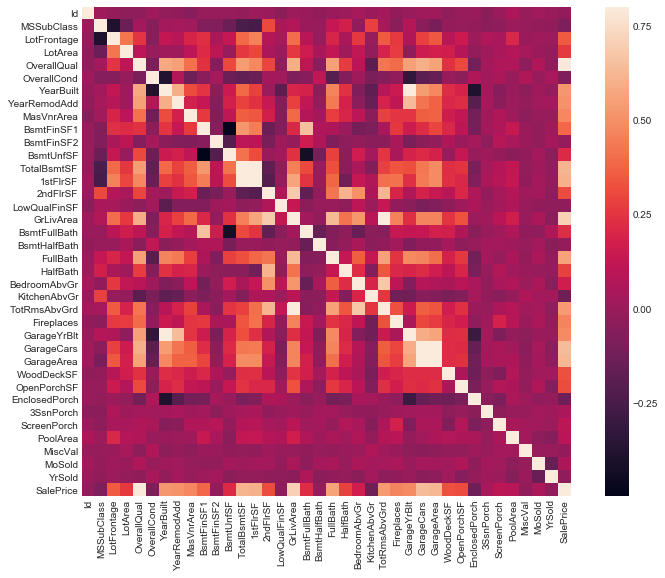

In [8]:
plt.subplots(figsize = (12,9))
sns.heatmap(train.corr(),vmax = 0.8,square = True)

# 可以发现某些特征之间存在很强的共线性
# 可以发现和价格因素相关较大的还是之前分析的几个因素，地上面积，总体质量，地下室总面积

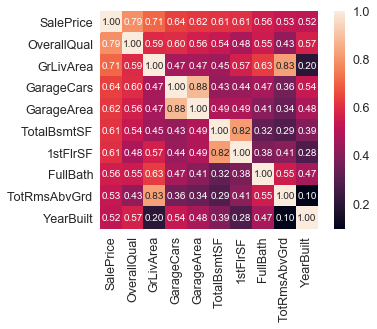

In [9]:
#显示与saleprice相关性前十的元素的热力图
k = 10 #number of variables for heatmap
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- 可以看出与房价相关性最高的确实是房屋质量等级，地上建筑面积
- 与车库有关的两个特征有高度的共线性0.88
- 地下室面积与一层面积有高度共线性0.82
- 地上建筑面积和地上房间数量有很高的共线性，0.83
- FULLBATH表示这个浴室具有洗手池，淋浴，浴缸，马桶。与房价相关性还较高
- 建造时间与房屋有一定的相关性

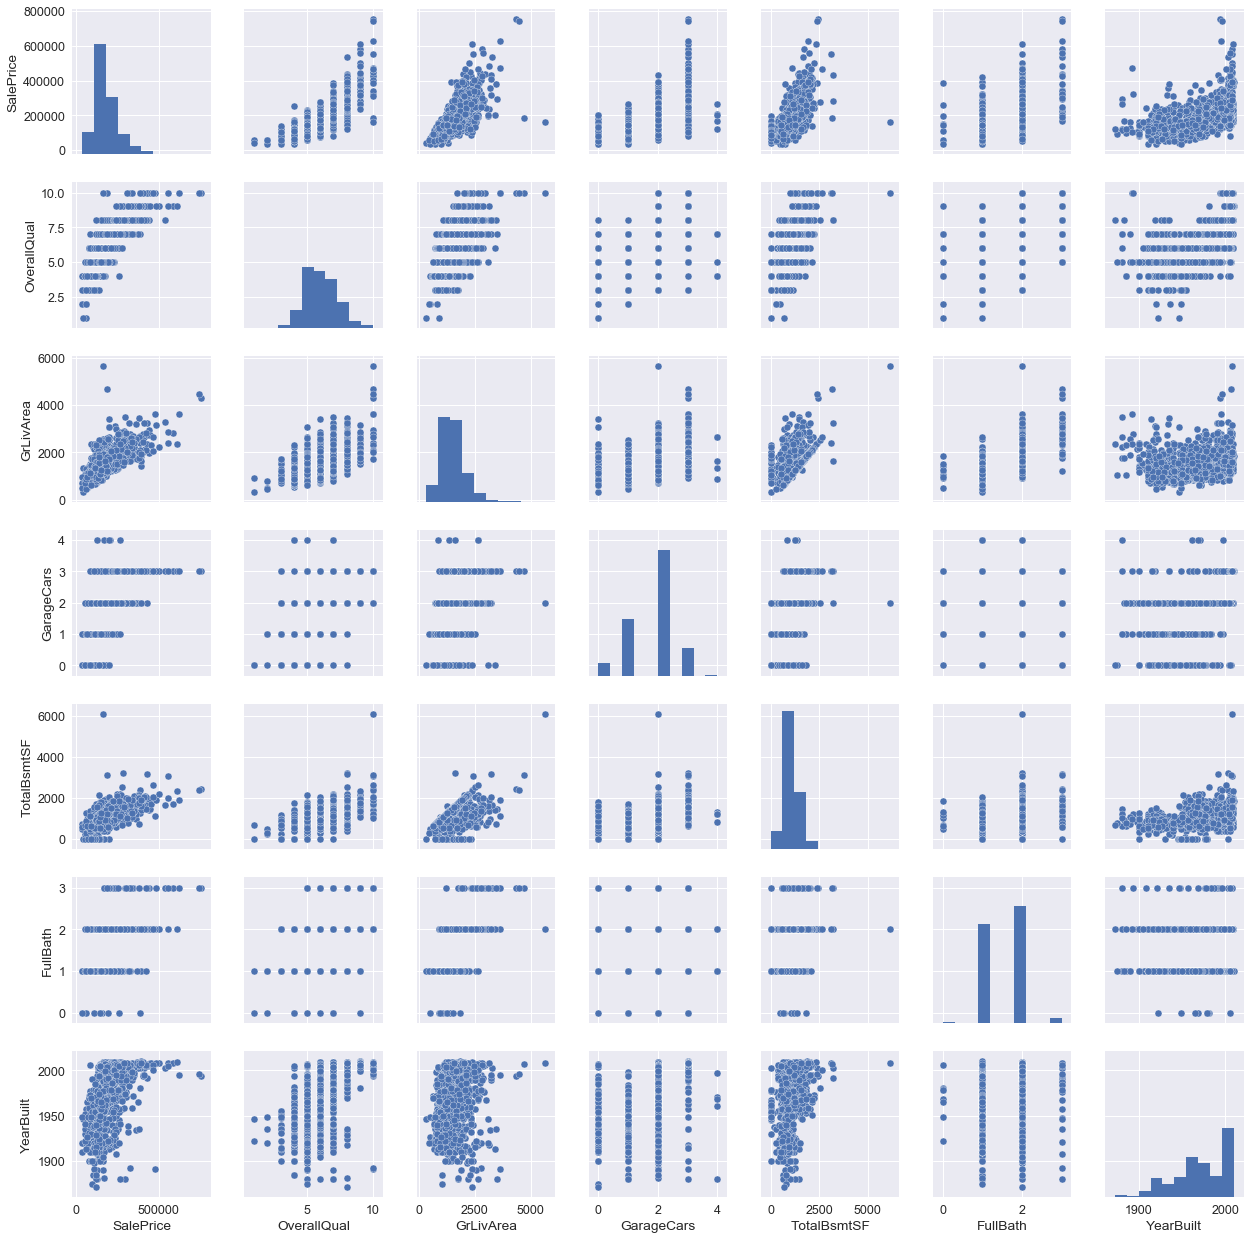

In [10]:
#将排名前列的参数进行抓对列表
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

- 注意价格和建造时间的之间的关系，价格随建筑年龄的缩小承大概的指数上升趋势

## 缺失值的处理

In [11]:
total = train.isnull().sum().sort_values(ascending = False)
Percentage = round((train.isnull().sum()/len(train)) * 100,2).sort_values(ascending = False)
data_nan = pd.concat([total,Percentage],axis = 1,keys = ['Total','Percent'])

In [12]:
#显示缺失值数量前二十的特征
data_nan.head(20)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


- 缺失值排名前列的参数都是一些奇怪的参数，而且缺失率远远大于15%，和价格也没什么关系，所以我们考虑删掉这些特征
- 在中间部分，车库与地下室相关的词缀，缺失率都差不多，推测这些缺失来自于相同的样本，因为之前分析里面的'garage cars'特征其实已经能很好的表示garage这一类的特征了，所以我们考虑删掉，同理地下室相关的词缀我们也做相同处理
- 所以我们决定将除了最后一个电力的特征保留之外，其他有缺失值的特征全部丢弃，电力特征缺失的那条样本我们选择删除

In [13]:
train = train.drop(train[train['Electrical'].isnull()].index)
train = train.drop(data_nan[data_nan['Total'] > 1].index,axis = 1)

In [14]:
#处理后确保没有缺失值了
train.isnull().sum().max()

0

## 处理异常值

In [15]:
#首先将价格标准化
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'].values.reshape(-1,1));

In [16]:
#打印价格中值最高及最低的10个点
lowrange = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
highrange = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

In [17]:
print('Low Range of Price')
print(lowrange)
print('_'*40)
print('High Range of Price')
print(highrange)

Low Range of Price
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
________________________________________
High Range of Price
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


## 可以看出低下限的几个点比平均值低2个标准差以内，而上限的几个点有的高出了5-7个标准差,我们先暂时不处理

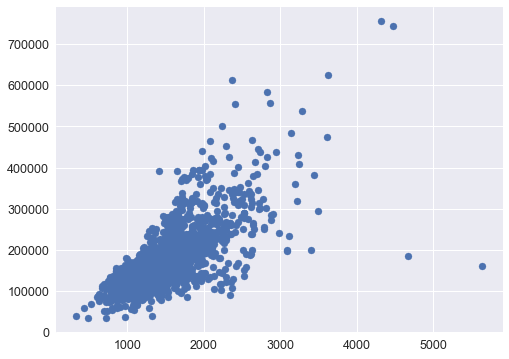

In [18]:
plt.subplots(figsize=(8, 6))
plt.scatter(x = train.GrLivArea,y = train.SalePrice)
plt.xlabels = ('GrLivArea')
plt.ylabels = ('SalePrice')


## 观察上述图表，我们发现有两个点面积很大，但是价格很低，有可能是因为土地性质不同造成的，所以这两个点我们纳入异常值考虑删除，而价格最高的几个点，就是我们之前所谓高出平均值好几个标准差的值，他们貌似在总的价格趋势上，所以我们考虑保留

In [19]:
#删除地面面积很大但是价格较低的两个异常点
index_t = list(train.sort_values(by = 'GrLivArea',ascending = False)[:2].index)
train = train.drop(index_t)

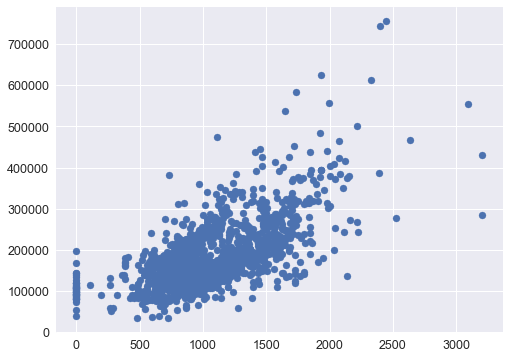

In [20]:
#地下室面积很大但是房价较低的几个点我们暂时不管
plt.subplots(figsize=(8, 6))
plt.scatter(x = train.TotalBsmtSF,y = train.SalePrice)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


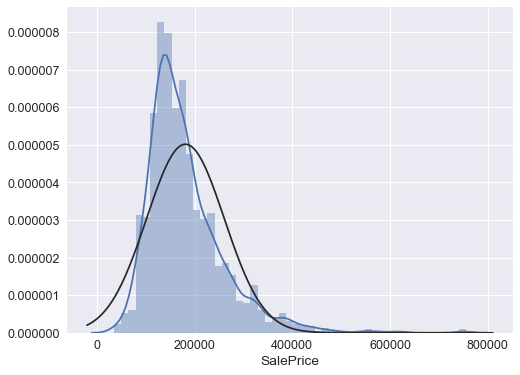

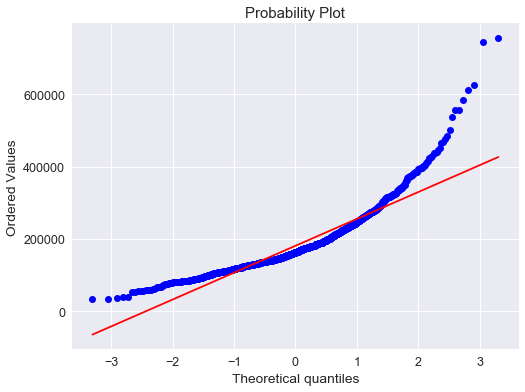

In [21]:
#可以看出价格分布有适当的右偏
plt.subplots(figsize=(8, 6))
sns.distplot(train['SalePrice'], fit=norm);
plt.subplots(figsize=(8, 6))
res = stats.probplot(train['SalePrice'], plot=plt)

In [22]:
#将价格使用Log函数转换一下
train.SalePrice = np.log(train.SalePrice)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


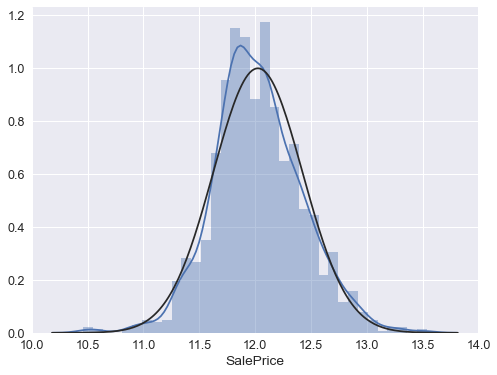

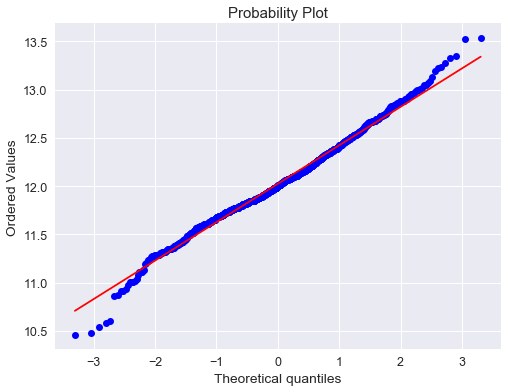

In [23]:
#可以看出转换后基本符合正态分布
plt.subplots(figsize=(8, 6))
sns.distplot(train['SalePrice'], fit=norm);
plt.subplots(figsize=(8, 6))
res = stats.probplot(train['SalePrice'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


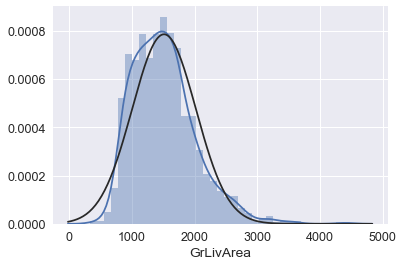

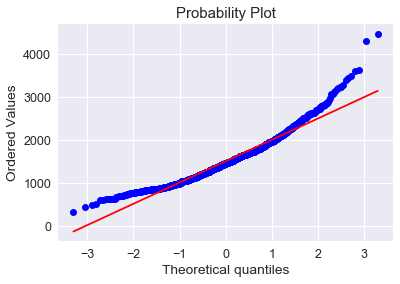

In [24]:
#检查地上面积特征分布，也是适度右偏
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [25]:
#使用log转换
train.GrLivArea = np.log(train.GrLivArea)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


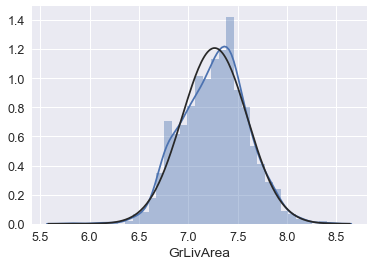

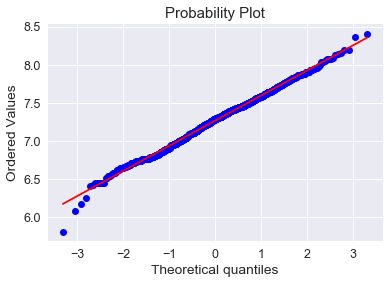

In [26]:
#可以看出转换后大概服从正态分布
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


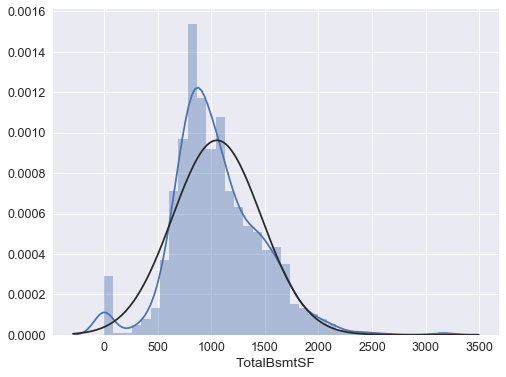

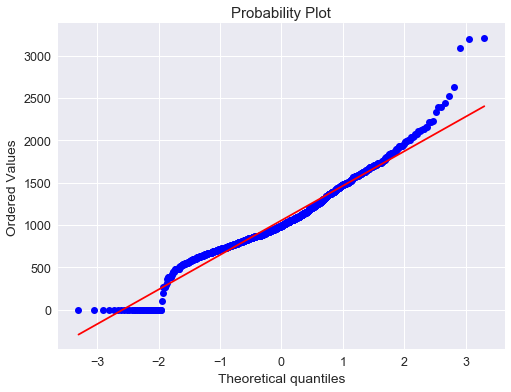

In [27]:
#现在看看地下室面积与价格的关系
plt.subplots(figsize=(8,6))
sns.distplot(train.TotalBsmtSF,fit = norm)
plt.subplots(figsize=(8,6))
res = stats.probplot(train.TotalBsmtSF,plot=plt)

In [28]:
#无法直接对地下室面积进行对数转换，因为有些没有地下室，面积为0
#所以我们想，只对地下室面积大于零的样本进行转换，其他的不去管
#建立一个新特征，标记此样本是否具有地下室

train['Has_Bsmt'] = 0
train.loc[train['TotalBsmtSF']>0,['Has_Bsmt']] = 1

#然后把有地下室的样本的地下室面积提取进行对数转换

train.loc[train.Has_Bsmt == 1,['TotalBsmtSF']] = np.log(train.TotalBsmtSF)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


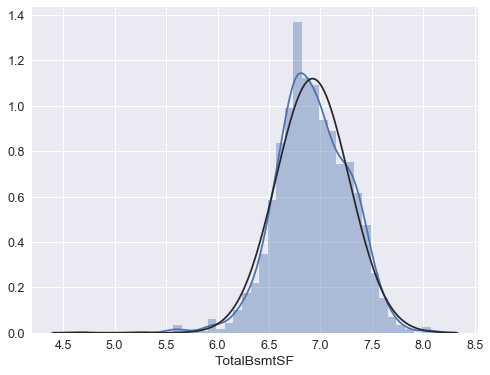

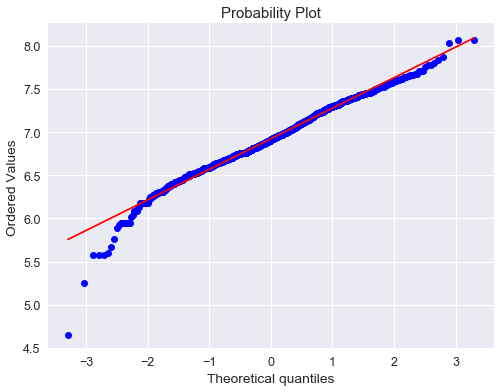

In [29]:
#再观察一下,可以看出处理后就比较符合正态分布了
plt.subplots(figsize=(8,6))
sns.distplot(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF'],fit = norm)
plt.subplots(figsize=(8,6))
res = stats.probplot(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF'],plot=plt)

Text(0,0.5,'price')

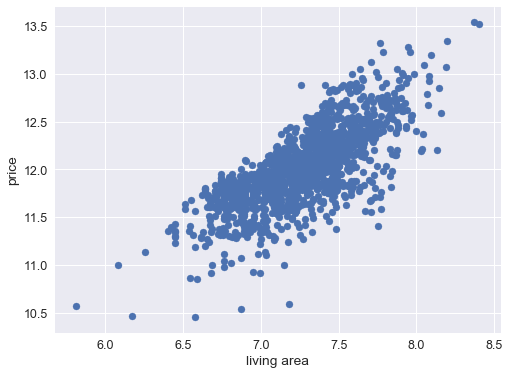

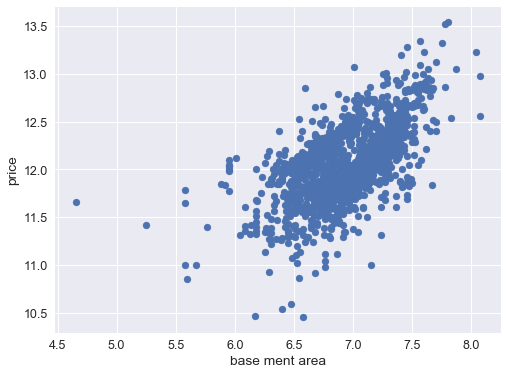

In [30]:
#现在再来看几个变量和价格的关系
fig = plt.subplots(figsize=(8,6))
plt.scatter(train['GrLivArea'], train['SalePrice']);
plt.xlabel('living area')
plt.ylabel('price')

fig = plt.subplots(figsize=(8,6))
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice']);
plt.xlabel('base ment area')
plt.ylabel('price')

## 可以看出现在都有很好的线性关系了

In [32]:
train.to_csv('train_log.csv',index = False)

In [33]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Has_Bsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,12.247694,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,12.109011,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,12.317167,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,11.849398,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,12.429216,1
